#Trabalho de Estatística e Probabilidade.
###Neste trabalho é estudado um dataset das vendas de mais de 11.500 jogos distintos desde a década de 90 até o ano de 2017.

Primeiramente são importadas as bibliotecas "pandas" e "numpy" bem como o próprio dataset.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files
uploaded = files.upload()

Saving Video_Games_Data.csv to Video_Games_Data.csv


Informações:
01. Name -> Nome do Jogo
02. Platform -> Plataforma do Jogo
03. Year_of_Release -> Ano de Lançamento
04. Genre -> Gênero
05. Publisher -> Editora
06. NA_Sales -> Vendas na América do Norte (em milhões)
07. EU_Sales -> Vendas na Europa (em milhões)
08. JP_Sales -> Vendas no Japão (em milhões)
09. Other_Sales -> Vendas em Outros Locais do Mundo (em milhões)
10. Global_Sales -> Vendas Globais (em milhões)
11. Critic_Score -> Avaliação da Crítica
12. Critic_Count -> Quantidade de Avaliação da Crítica
13. User_Score -> Avaliação dos Usuários/Jogadores
14. User_Count -> Quantidade de Avaliação dos Usuários/Jogadores
15. Developer -> Desenvolvedora
16. Rating -> Classificação Indicativa

Jogos sem nome serão removidos visto que não podem ser identificados.

In [ ]:
data = pd.read_csv('Video_Games_Data.csv')
data = data.dropna(subset = ['Name'])
data

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16714,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,Tecmo Koei,0.00,0.00,0.01,0.00,0.01,NaN,NaN,NaN,NaN,NaN,NaN
16715,LMA Manager 2007,X360,2006.0,Sports,Codemasters,0.00,0.01,0.00,0.00,0.01,NaN,NaN,NaN,NaN,NaN,NaN
16716,Haitaka no Psychedelica,PSV,2016.0,Adventure,Idea Factory,0.00,0.00,0.01,0.00,0.01,NaN,NaN,NaN,NaN,NaN,NaN
16717,Spirits & Spells,GBA,2003.0,Platform,Wanadoo,0.01,0.00,0.00,0.00,0.01,NaN,NaN,NaN,NaN,NaN,NaN


##Modificações do DataSet

Agora são identificadas quais colunas possuem células sem valores.

In [ ]:
data.isna().any()

Name               False
Platform           False
Year_of_Release     True
Genre              False
Publisher           True
NA_Sales           False
EU_Sales           False
JP_Sales           False
Other_Sales        False
Global_Sales       False
Critic_Score        True
Critic_Count        True
User_Score          True
User_Count          True
Developer           True
Rating              True
dtype: bool

A coluna "User_Score" possui como um de seus valores uma string: tbd ("to be determined" traduzindo: para ser determinado) portanto, foi decidido substituir esse valor por NaN, para então mudar o tipo dessa coluna que é object para um tipo numérico.

In [ ]:
data.User_Score.replace('tbd', np.nan, inplace = True)
data.User_Score = pd.to_numeric(data["User_Score"])

Visto que no DataSet jogos lançados em mais de uma plataforma são contabilizados como linhas distintas, serão criados subgrupos do dataset que contenham as informações necessárias para responder as questões propostas.

In [ ]:
sales_group = data.groupby('Name', as_index = False).agg({'Platform':' '.join, 'Year_of_Release': 'first', 'Genre' : 'first', 'NA_Sales': 'sum', 'EU_Sales' : 'sum', 'JP_Sales' : 'sum', 'Global_Sales' : 'sum'})
critics_group = data.groupby('Name', as_index = False).agg({'Critic_Score': 'first', 'Critic_Count' : 'sum', 'User_Score' : 'first', 'User_Count' : 'sum'})
sales_group

,Name,Platform,Year_of_Release,Genre,NA_Sales,EU_Sales,JP_Sales,Global_Sales
0,Beyblade Burst,3DS,2016.0,Role-Playing,0.00,0.00,0.03,0.03
1,Fire Emblem Fates,3DS,2015.0,Role-Playing,0.81,0.23,0.52,1.68
2,Frozen: Olaf's Quest,3DS DS,2013.0,Platform,0.48,0.53,0.00,1.12
3,Haikyu!! Cross Team Match!,3DS,2016.0,Adventure,0.00,0.00,0.04,0.04
4,Tales of Xillia 2,PS3,2012.0,Role-Playing,0.20,0.12,0.45,0.84
...,...,...,...,...,...,...,...,...
11557,thinkSMART: Chess for Kids,DS,2011.0,Misc,0.01,0.00,0.00,0.01
11558,uDraw Studio,Wii,2010.0,Misc,1.65,0.57,0.00,2.42
11559,uDraw Studio: Instant Artist,Wii X360,2011.0,Misc,0.07,0.10,0.00,0.19
11560,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,1.57,1.02,0.00,3.00


Para lidar com os jogos os quais os anos de lançamento não estão presentes foi decidido que seria colocado no lugar o ano médio de lançamentos dos jogos da mesma plataforma.

In [ ]:
sales_group.Year_of_Release.fillna(sales_group.groupby('Platform')['Year_of_Release'].transform('mean'), inplace = True)
sales_group.Year_of_Release = sales_group.Year_of_Release.astype('int')
sales_group

,Name,Platform,Year_of_Release,Genre,NA_Sales,EU_Sales,JP_Sales,Global_Sales
0,Beyblade Burst,3DS,2016,Role-Playing,0.00,0.00,0.03,0.03
1,Fire Emblem Fates,3DS,2015,Role-Playing,0.81,0.23,0.52,1.68
2,Frozen: Olaf's Quest,3DS DS,2013,Platform,0.48,0.53,0.00,1.12
3,Haikyu!! Cross Team Match!,3DS,2016,Adventure,0.00,0.00,0.04,0.04
4,Tales of Xillia 2,PS3,2012,Role-Playing,0.20,0.12,0.45,0.84
...,...,...,...,...,...,...,...,...
11557,thinkSMART: Chess for Kids,DS,2011,Misc,0.01,0.00,0.00,0.01
11558,uDraw Studio,Wii,2010,Misc,1.65,0.57,0.00,2.42
11559,uDraw Studio: Instant Artist,Wii X360,2011,Misc,0.07,0.10,0.00,0.19
11560,wwe Smackdown vs. Raw 2006,PS2,2004,Fighting,1.57,1.02,0.00,3.00


##Medidas de Dispersão

Quais são as medidas de dispersão da série Global Sales? O objetivo dessa seção recai em entender como os dados estão distribuídos ao longo do "dataset" bem como eles variam da tendencia central.

###Variância

In [ ]:
sales_group.Global_Sales.var()

4.985257466892558

###Desvio Padrão

In [ ]:
sales_group.Global_Sales.std()

2.2327690133313296

Vale-se ressaltar que as medidas de vendas: Global_Sales, NA_Sales, etc; apesar de serem valores reais representam as vendas em milhões de unidades, portanto existe uma grande variação e desvio causados pelas anomalias presentes nos dados, que serão mostradas na seção de Gráficos Iniciais.

##Gráficos Iniciais

Aqui são analisadas as ditribuições das unidades vendidas dos jogos de acordo com as regiões distacadas no "dataset"(América do Norte, Japão e Europa) assim como mundialmente.

Text(0, 0.5, 'Unidades Vendidas Mundialmente (em milhões)')

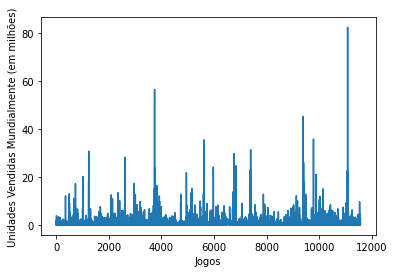

In [ ]:
plt.plot(sales_group.Global_Sales)
plt.xlabel('Jogos')
plt.ylabel('Unidades Vendidas Mundialmente (em milhões)')

Text(0, 0.5, 'Unidades Vendidas na América do Norte (em milhões)')

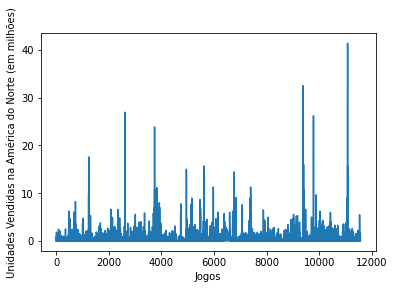

In [ ]:
plt.plot(sales_group.NA_Sales)
plt.xlabel('Jogos')
plt.ylabel('Unidades Vendidas na América do Norte (em milhões)')

Text(0, 0.5, 'Unidades Vendidas no Japão (em milhões)')

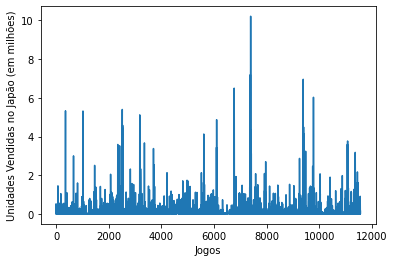

In [ ]:
plt.plot(sales_group.JP_Sales)
plt.xlabel('Jogos')
plt.ylabel('Unidades Vendidas no Japão (em milhões)')

Text(0, 0.5, 'Unidades Vendidas na Europa (em milhões)')

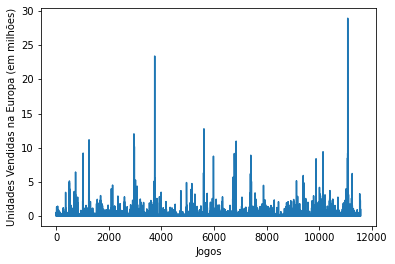

In [ ]:
plt.plot(sales_group.EU_Sales)
plt.xlabel('Jogos')
plt.ylabel('Unidades Vendidas na Europa (em milhões)')

Devido ao fator de que há uma grande distribuição de dados e que há grandes anomalias, como foi mostrado nos gráficos acima. Portanto foi decidido que, para fins de aproximação da tendência central, seria utilizada a média truncada das vendas de cada região ao invés da média comum. Para tal serão retirados aproximadamente os 100 maiores e menores valores que equivalem a aproximadamente 1%. 

In [ ]:
from scipy import stats

GS_mean = stats.trim_mean(sales_group.Global_Sales, 0.01)
NA_mean = stats.trim_mean(sales_group.NA_Sales, 0.01)
JP_mean = stats.trim_mean(sales_group.JP_Sales, 0.01)
EU_mean = stats.trim_mean(sales_group.EU_Sales, 0.01)

##Probabilidade Simples

###De todos os jogos, quais as chances de um deles ter um total de vendas global acima da média de vendas mundial?

Esses dados foram explorados a fim de saber quais as chances de um jogo conseguir um total de vendas acima da média pois esse dado ditaria as chances que um jogo tem de ter uma grande arrecadação partindo do total de unidades vendidas e, baseado nessa probabilidade, se existem características específicas que outros jogos deveriam ter para obter os mesmos resultados.

In [ ]:
prob_GS_greater = len(sales_group[sales_group.Global_Sales > GS_mean])/len(sales_group)
prob_GS_greater = round((prob_GS_greater * 100), 2)

print("A probabilidade de um jogo possuir um total de vendas global maior que a média é de: " + str(prob_GS_greater) + "%")

A probabilidade de um jogo possuir um total de vendas global maior que a média é de: 24.69%


###Conclusão

Ao saber que pouco menos de 1/4 dos jogos conseguem uma venda acima da média, a hipótese formulada é de que existem fatores que possuem uma vasta influência no resultado dessas vendas, que podem girar em torno do gênero daquele jogo, da região em que ele é mais vendido, a avaliação que ele recebe, entre outras variáveis, logo o objetivo a seguir é a capacidade de identificar quais são esses fatores e o quão influentes eles são no resultado.

##Probabilidade da União

Esses dados foram explorados a fim de saber quais as chances de um jogo conseguir um total de vendas acima da média em um grupo de regiões específicas pois esse dado ditaria quais as regiões mais influentes nas vendas de jogos visto que, por lógica, jogos que conseguem vender acima da média em regiões específicas tedneriam a vender acima da média no mundo.

###Qual a probabilidade de um jogo ter vendido um total acima da média na América do Norte ou no Japão?

In [ ]:
prob_NA_JP = len(sales_group[(sales_group.NA_Sales > NA_mean) | (sales_group.JP_Sales > JP_mean)])/len(sales_group)
prob_NA_JP = round((prob_NA_JP * 100), 2)

print("A probabilidade de um jogo ter vendido um total acima da média na América do Norte ou no Japão é de: " + str(prob_NA_JP) + "%")

A probabilidade de um jogo ter vendido um total acima da média na América do Norte ou no Japão é de: 40.96%


###Qual a probabilidade de um jogo ter vendido um total acima da média na América do Norte ou na Europa?

In [ ]:
prob_NA_EU = len(sales_group[(sales_group.NA_Sales > NA_mean) | (sales_group.EU_Sales > EU_mean)])/len(sales_group)
prob_NA_EU = round((prob_NA_EU * 100), 2)

print("A probabilidade de um jogo ter vendido um total acima da média na América do Norte ou na Europa é de: " + str(prob_NA_EU) + "%")

A probabilidade de um jogo ter vendido um total acima da média na América do Norte ou na Europa é de: 29.48%


###Qual a probabilidade de um jogo ter vendido um total acima da média na Europa ou no Japão?

In [ ]:
prob_EU_JP = len(sales_group[(sales_group.EU_Sales > EU_mean) | (sales_group.JP_Sales > JP_mean)])/len(sales_group)
prob_EU_JP = round((prob_EU_JP * 100), 2)

print("A probabilidade de um jogo ter vendido um total acima da média na Europa ou no Japão é de: " + str(prob_EU_JP) + "%")

A probabilidade de um jogo ter vendido um total acima da média na Europa ou no Japão é de: 38.8%


###Conclusão

Ao saber que os jogos tem aproximadamente 41% de probabilidade de venderem acima da média no Japão e na América do Norte, isso significaria que uma desenvolvedora terá mais chance de ter uma boa margem de vendas caso foque seus esforços nessas duas regiões. É hipotetisado que essas são as duas regiões com um maior volume proporcional de vendas provavelmente pelo fator de que os maiores polos da indústria dos Video Games seriam essas duas regiões.

###Comparação com Dados Externos

De acordo com esta [tabela](https://newzoo.com/insights/rankings/top-10-countries-by-game-revenues) do site Newzoo, o Estados Unidos e o Canadá, as duas principais economias da América do Norte, representam uma arrecadação de 51.26 bilhões de dólares, enquanto que o Japão representa 22.01 bilhões, isso no projetado para o ano de 2020. Isto corrobora com a ideia de que estas duas regiões representam os polos da indústria de Video Games. Vale-se ressaltar que caso a região da Ásia tivesse sido contabilizada esta provavelmente teria maior representatividade por conta da China.

##Probabilidade da Diferença

Esses dados foram explorados a fim de saber dentre Japão e América do Norte, qual a região que teria maior influência no total de vendas de um jogos comparando as chances de um jogo ter tido vendas acima da média em determinada região, sem ter tido na outra.

###Qual a probabilidade de um jogo ter vendido uma quantidade acima da média no Japão, mas não na América do Norte?

In [ ]:
JP_not_NA = len(sales_group[sales_group.JP_Sales > JP_mean]) - len(sales_group[(sales_group.NA_Sales > NA_mean) & 
                                                                                                   (sales_group.JP_Sales > JP_mean)])
prob_JP_not_NA = JP_not_NA/len(sales_group)
prob_JP_not_NA = round((prob_JP_not_NA * 100),2)
print("A probabilidade de um jogo ter vendido acima da média no Japão, mas não na América do Norte é de: " + str(prob_JP_not_NA) + "%")

A probabilidade de um jogo ter vendido acima da média no Japão, mas não na América do Norte é de: 15.95%


###Qual a probabilidade de um jogo ter vendido uma quantidade acima da média na América do Norte, mas não no Japão?

In [ ]:
NA_not_JP = len(sales_group[sales_group.NA_Sales > NA_mean]) - len(sales_group[(sales_group.NA_Sales > NA_mean) & 
                                                                                                   (sales_group.JP_Sales > JP_mean)])
prob_NA_not_JP = NA_not_JP/len(sales_group)
prob_NA_not_JP = round((prob_NA_not_JP * 100),2)
print("A probabilidade de um jogo ter vendido acima da média no Japão, mas não na América do Norte é de: " + str(prob_NA_not_JP) + "%")

A probabilidade de um jogo ter vendido acima da média no Japão, mas não na América do Norte é de: 18.37%


###Conclusão

Ao saber que os jogos tem 18.37% de probabilidade de venderem acima da média na América do Norte, mas não no Japão isto significaria que a América do Norte é de a região mais influente do mundo no que diz respeito a venda de jogos, buscasse então corroborar esses dados a partir da Covariância e Correlação entre as vendas da América do Norte com as vendas Globais.

##Covariância e Correlação

###O quão correlacionados são as vendas das duas principais regiões do mundo com o total de vendas mundial?

In [ ]:
sales_group[['Global_Sales', 'NA_Sales']].cov()

,Global_Sales,NA_Sales
Global_Sales,4.985257,2.476732
NA_Sales,2.476732,1.370320


In [ ]:
sales_group[['Global_Sales', 'JP_Sales']].cov()

,Global_Sales,JP_Sales
Global_Sales,4.985257,0.466925
JP_Sales,0.466925,0.149060


In [ ]:
sales_group[['Global_Sales', 'NA_Sales']].corr()

,Global_Sales,NA_Sales
Global_Sales,1.000000,0.947598
NA_Sales,0.947598,1.000000


In [ ]:
sales_group[['Global_Sales', 'JP_Sales']].corr()

,Global_Sales,JP_Sales
Global_Sales,1.000000,0.541656
JP_Sales,0.541656,1.000000


###Conclusão

A partir dos dados obtidos de Covariância e Correlação pode-se comprovar que de fato que a América do Norte é a região mais influente visto que:

1. Como o valor da Covariância é positivo mostra que a medida que as vendas na América do Norte Crescem as vendas mundiais também crescem, o que já era esperado.
2. Devido a magnitude da Correlação é expresso que as vendas na América do Norte possuem grande interferência aparente no total de vendas Global de um jogo.

##Probabilidade da Intersecção

###Qual a probabilidade de um jogo ter tido um total de vendas acima da média mundial e ser um jogo que foi lançado para uma única plataforma?

Esses dados foram explorados a fim de saber quais as chances de um jogo conseguir um total de vendas acima da média dependendo do total de plataformas vendidas, sabendo-se que o jogo mais vendido de todos, o Wii Sports é exclusivo da plataforma Wii, foi questionado se o total de plataformas em que um jogo é vendido de fato influencia no resultado final.

In [ ]:
sales_group['Total_Platforms'] = sales_group['Platform'].str.split().str.len()
sales_group.sort_values('Global_Sales')

,Name,Platform,Year_of_Release,Genre,NA_Sales,EU_Sales,JP_Sales,Global_Sales,Total_Platforms
3425,Fuuraiki 3,PSV,2015,Action,0.00,0.00,0.01,0.01,1
978,Bomberman (jp sales),PSP,2006,Puzzle,0.00,0.00,0.01,0.01,1
3503,Game Book DS: Sword World 2.0,DS,2009,Role-Playing,0.00,0.00,0.01,0.01,1
5103,Kurogane Kaikitan,PSV,2015,Adventure,0.00,0.00,0.01,0.01,1
8128,Rosario to Vampire: Tanabata no Miss Youkai Ga...,DS,2008,Adventure,0.00,0.00,0.01,0.01,1
...,...,...,...,...,...,...,...,...,...
5613,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,35.52,1
9778,Tetris,GB NES,1989,Puzzle,26.17,2.95,6.03,35.84,2
9389,Super Mario Bros.,NES GB,1985,Platform,32.48,4.88,6.96,45.31,2
3743,Grand Theft Auto V,PS3 X360 PS4 XOne PC,2013,Action,23.84,23.42,1.42,56.57,5


In [ ]:
GS_greater_and_one_plat = len(sales_group[(sales_group.Global_Sales > GS_mean) & (sales_group.Total_Platforms == 1)])
GS_greater_and_one_plat = GS_greater_and_one_plat/len(sales_group)
GS_greater_and_one_plat = round((GS_greater_and_one_plat * 100), 2)
print("A probabilidade de um jogo ter tido um total de vendas acima da média mundial e ser um jogo exclusivo de uma única plataforma é de: " + str(GS_greater_and_one_plat) + "%")

A probabilidade de um jogo ter tido um total de vendas acima da média mundial e ser um jogo exclusivo de uma única plataforma é de: 12.07%


###Conclusão

Ao saber que os jogos tem aproximadamente 12% de chance de terem vendas acima da média sendo vendidos em apenas uma única plataforma, é reafirmada a noção de que um jogo terá mais sucesso caso seja vendido em múltiplas plataformas, isso também leva a conclusão de que os jogos que conseguem um grande total de vendas sendo exclusivos de uma única plataforma são na realidade anomalias do conjunto de dados, sendo o jogo mais vendido de todos a maior das anomalias.

##Probabilidade do Complemento

###Qual a probabilidade de um jogo ter tido um total de vendas acima da média mundial e não ser um jogo exclusivo de uma única plataforma?

Esses dados foram explorados a fim de corroborar com a conclusão da seção anteiror.

In [ ]:
prob_not_one_exc = prob_GS_greater - GS_greater_and_one_plat
prob_not_one_exc = round((prob_not_one_exc), 2)
print("A probabilidade de um jogo ter tido um total de vendas acima da média mundial e não ser um jogo exclusivo de uma única plataforma é de: " + str(prob_not_one_exc) + "%")

A probabilidade de um jogo ter tido um total de vendas acima da média mundial e não ser um jogo exclusivo de uma única plataforma é de: 12.62%


Entretanto ao saber que os jogos tem 12,62% de chance de terem vendas acima da média sendo vendidos em mais de uma plataforma, a noção de que um jogo terá mais sucesso caso seja vendido em múltiplas plataformas aparenta não estar correta devida a proximidade de amabas as probabilidades, isso mostra que o total de plataformas em quer um jogo é vendido não representa uma grande influência no resultado. Porém é teorizado que talvez não seja o total de plataformas para qual um jogo é lançado que influencie, mas na realidade qual a plataforma.

###Comparação com Dados Externos

In [ ]:
sales_group.nlargest(50, ['Global_Sales'])

,Name,Platform,Year_of_Release,Genre,NA_Sales,EU_Sales,JP_Sales,Global_Sales,Total_Platforms
11075,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,82.53,1
3743,Grand Theft Auto V,PS3 X360 PS4 XOne PC,2013,Action,23.84,23.42,1.42,56.57,5
9389,Super Mario Bros.,NES GB,1985,Platform,32.48,4.88,6.96,45.31,2
9778,Tetris,GB NES,1989,Puzzle,26.17,2.95,6.03,35.84,2
5613,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,35.52,1
11077,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,32.77,1
7392,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,31.37,1
1242,Call of Duty: Black Ops,X360 PS3 PC Wii DS,2010,Shooter,17.57,9.35,0.59,30.82,5
1249,Call of Duty: Modern Warfare 3,X360 PS3 PC Wii,2011,Shooter,15.54,11.15,0.62,30.59,4
6767,New Super Mario Bros.,DS,2006,Platform,11.28,9.14,6.50,29.80,1


Neste [gráfico](https://www.statista.com/statistics/1101872/unit-sales-video-game-consoles/#:~:text=The%20PS2%20has%20become%20the,units%20as%20of%20July%202022.) do site Statista, está uma lista das plataformas mais vendidas de jogos da história, tais como: Nintendo Wii(Wii), PlayStation3(PS3), XBox360 (X360) e GameBoy(GB). Essas plataformas aparecem frequentemente entre os 50 jogos mais vendidos do dataset, portanto podemos dizer que a **popularidade da plataforma**, ou seja o quanto ela foi vendida, possui uma certa influencia no resultado das vendas de um determindado jogo pode ter. Dito isso é possível chegar a conclusão de que os jogos que são lançados para paltaformas populares são os que mais tem chance de terem bons resultados de vendas mundialmente.
Obs.: Caso não consiga acessar o gráfico do Statista, há também esta [tabela](https://www.vgchartz.com/charts/platform_totals/Hardware.php/) do site VGChartz, um site especializado em gráficos de video games, que também concorda com a análise dos dados externos.

##Variáveis Aleatórias

In [ ]:
sales_group.Total_Platforms.value_counts()

1     8756
2     1523
3      716
4      281
5      149
6       87
7       32
8       13
9        4
12       1
Name: Total_Platforms, dtype: int64

In [ ]:
sales_group.Total_Platforms.value_counts(sort=False).sort_index()

1     8756
2     1523
3      716
4      281
5      149
6       87
7       32
8       13
9        4
12       1
Name: Total_Platforms, dtype: int64

###Função Probabilidade

In [ ]:
fp = sales_group.Total_Platforms.value_counts(sort=False).sort_index()/sales_group.Total_Platforms.count()
print(fp)

1     0.757308
2     0.131725
3     0.061927
4     0.024304
5     0.012887
6     0.007525
7     0.002768
8     0.001124
9     0.000346
12    0.000086
Name: Total_Platforms, dtype: float64


###Função Repartição

Text(0.5, 1.0, 'Gráfico Acumulado')

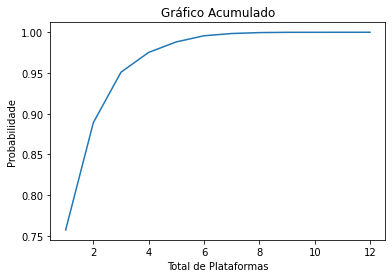

In [ ]:
repart = fp.cumsum()
plt.plot(repart)
plt.xlabel('Total de Plataformas')
plt.ylabel('Probabilidade')
plt.title('Gráfico Acumulado')

##Probabilidade Condicional

###Qual a probabilidade de um jogo ter um total de vendas maior que a média, mundilamente, sabendo que o gênero do jogo é Ação?

Tendo-se analisado a influência da região nas vendas mundiais de um jogo, agora é abordada a questão do quão influente é o gênenro do mesmo, tendo em vista que o gênero de Ação é aquele que possui a maior quantidade de unidades vendidas, foi decidido verificar se de fato o gênero influenciava a venda dos jogos.

In [ ]:
genre = sales_group.groupby('Genre')
genre.sum().sort_values('Global_Sales')

,Year_of_Release,NA_Sales,EU_Sales,JP_Sales,Global_Sales,Total_Platforms
Genre,,,,,,
Strategy,1169131,68.54,45.11,49.66,174.41,681
Adventure,2132339,105.26,63.54,52.39,237.78,1305
Puzzle,998539,122.87,50.01,57.31,243.02,580
Simulation,1464780,182.19,113.52,63.80,390.42,874
Fighting,1228344,223.36,100.33,87.48,447.48,849
Racing,1546722,359.35,236.51,56.71,728.90,1249
Misc,2669202,407.28,212.75,108.11,803.21,1751
Platform,1177618,445.50,200.35,130.83,828.08,888
Role-Playing,2461896,330.81,188.71,355.46,934.40,1500


In [ ]:
prob_action_greater = len(sales_group[(sales_group.Global_Sales > GS_mean) & (sales_group.Genre == "Action")])/len(sales_group)
prob_action_games = len(sales_group.Genre == "Action")/len(sales_group)
prob_action_greater = prob_action_greater / prob_action_games
prob_action_greater = round((prob_action_greater * 100), 2)

print("A probabilidade de um jogo ter um total de vendas maior que a média, mundilamente, sabendo que o gênero do jogo é Ação é de: " + str(prob_action_greater) + "%")

A probabilidade de um jogo ter um total de vendas maior que a média, mundilamente, sabendo que o gênero do jogo é Ação é de: 4.79%


###Conclusão

A partir do resultado obtido, é visível que o gênero de um jogo pouco influencia em seu total de vendas. Isso pode ser concluído visto que mesmo o gênero com maior total de vendas tem pouca representatividade entre os jogos que tiveram vendas maiores que a média mundial, logo podemos assumir que o gênero possuiria pouca influência no resultado final.

##Teorema de Bayes

Este dado foi extraído para corroborar com a conclusão anterior


###Qual a probabilidade do gênero de um jogo ser Ação tal que é um jogo que teve um total de vendas maior que a média?

In [ ]:
prob_greater_tq_rpg_greater = (prob_action_games*prob_action_greater)/prob_GS_greater
print('A probabilidade de um jogo ter um total de vendas maior que a média mundial tal que o gênero do jogo é Ação é de : ' + str(round((prob_greater_tq_rpg_greater*100),4)) + '%')

A probabilidade de um jogo ter um total de vendas maior que a média mundial tal que o gênero do jogo é Ação é de : 19.4006%


###Conclusão

A partir do resultado obtido, temos que, aproximadamente, 1/5 dos jogos que tiveram um resultado acima da média são de ação. Quando analisamos esse dados considerando a conclusão anterior, podemos dizer que este resultado expressa que apesar de uma quântidade razoável de jogos com bons resultados terem sido de ação, o gênero em si do jogo não necessariamente exerce uma grande influência sobre o resultado. Isso poderia ser concluído pelo prisma da seguinte hipótese: O resultado é causado pela quantidade de jogos de ação produzidos; caso este gênero tenha a maior quantidade de jogos, este resultado indicaria que os jogos de ação são os mais produzidos entre os jogos de forma geral, mas isso não os fazem jogos de maior sucesso, o que validaria a conclusão da seção anterior.

##Estatística Descritiva

###Como se dá a distribuição dos jogos ao longo dos anos? (Histograma)

In [ ]:
import plotly.express as px
fig = px.histogram(sales_group, x = 'Year_of_Release')
fig.show()

####Conclusão

A partir do gráfico obtido, é notável o crescimento dos jogos a partir da década de 90. A hipótese formulada é que ocorreu um crescimento das produtoras de jogos a partir desse período e devido a concorrência, um descrescimento do preço fazendo dos jogos mais acessíveis e tornando sua comercialização mais lucrativa.

####Comparação com Dados Externos

Este [artigo](https://www.weforum.org/agenda/2020/11/gaming-games-consels-xbox-play-station-fun/#:~:text=Early%20prototypes%20of%20video%20games,their%20own%20knock%2Doff%20versions.) do "World Economic Forum" trás um breve resumo da história do desenvolvimento da indústria dos jogos.

No início da década de 80, a maior empresa de jogos existente, a Atari, tomou péssimas decisões de mercado que foram repetidas por outras empresas do ramo. Isso causou a Quebra do Mercado de Jogos de 1983, o que é refletido na queda de jogos produzidos a partir do mesmo ano. Entretanto ao final da 80, a Nintendo lançou o NES (Nintendo Entertainment System), em seguida foi lançado o GameBoy em 1989 que como já foi constatado previamente é um dos consoles mais vendidos da história, juntamente com o Playstation em 1994, que foi uma das primeiras plataformas a utilizar CD's além disso nessa época teve o surgimento do modelo de jogos 3D, abrindo espaço para a acenção de outros gêneros de jogos, por fim, no início dos anos 2000 os jogos para multijogadores também surgiram e popularizaram.

A partir dessas informações conclui-se que a evolução tecnológica dos equipamentos foi a responsável pelo crescimento vertiginoso da indústria, tornando não somente os jogos mais acessíveis como também mais variados e por consequência abrangindo um maior público.

###Algum gênero de jogo foi favorecido com o passar dos anos? (Boxplot)

Para dar um melhor contexto, a partir das informações obtidas na comparação com dados externos da parte anterior, surge a dúvida: As evoluções tecnológicas presentes a partir da década de 90 favoreceram algum gênero de jogo em específico?

In [ ]:
fig2 = px.box(sales_group, x='Genre', y='Year_of_Release')
fig2.show()

#####Conclusão

Pode-se perceber que a partir da metade da década de 90, quando surgem os jogos 3D alguns gêneros começam a ter uma maior produção visto que seus limites inferiores são mais próximos aos seus respectivos primeiros quartis, especificamente jogos de: Aventura, Misc e Simulação; fazendo-se crer que esses gêneros foram os mais impactados com a evolução da tecnologia gráfica. Apesar disso vale-se resaltar que, quando analisando as caixas propriamente ditas, o valores de todos os quartis de todos os gêneros giram em torno de valores próximos, mesmo que alguns gêneros tenham maior variação que outros, é válido concluir que todos os gêneros foram fortemente beneficiados pelo avanço da tecnologia tendo em vista a proximidade dos valores do primeiro quartil de cada gênero, indicando que todos os gêneros a partir do final da década de 90 e início dos anos 2000 começaram a ser mais produzidos.

###Como se dá a correlação entre as vendas em âmbito continental/nacional com a o total de vendas mundial? (Scatter Plot)

O objetivo desta seção é comparar a percepção da correlação utlizando o método gráfico (abaixo) com o método aritimético (Seção de Covariância e Correlação).

In [ ]:
fig2 = px.scatter(sales_group, x='NA_Sales', y='Global_Sales')
fig2.show()

In [ ]:
fig2 = px.scatter(sales_group, x='JP_Sales', y='Global_Sales')
fig2.show()

In [ ]:
fig2 = px.scatter(sales_group, x='EU_Sales', y='Global_Sales')
fig2.show()

####Conclusão

Como mostrado na sessão de covariância e correlação percebe-se a maior influência da América do Norte. Entretanto quando comparadas a representação gráfica com o resultado aritimético, apesar da correlação ser evidente, fica menos perceptível a sua força.

Portanto há de se concluir que o uso do scatter plot é muito últil para uma análise de cvariância, ao indicar a forma qual os dados estão variando, isto é a forma que um dado varia em detrimento do outro, além de mostrar se estão de fato correlacionados de alguma forma, no entanto o método puramente aritimético consegue prover dados qualitativos mais precisos e objetivos do que o método gráfico tal como a força da correlação que não fica tão evidente graficamente.

###Como se dá graficamente a correlação entre os dados do DataSet? (Mapa de Calor de Correlação)

O Objetivo desta sessão é comparar a análise puramente aritimética com a análise gráfica da correlação em questões de eficiência em extrair dados.

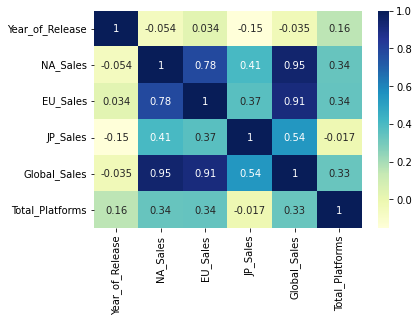

In [ ]:
import seaborn as sb
dataplot = sb.heatmap(sales_group.corr(), cmap="YlGnBu", annot=True)

####Conclusão

Como pode-se perceber, o mapa de calor consegue indicar a correlação entre variáveis muito rapidamente, inclusive pode-se notar que as informações do mapa refutam uma das ideias previamente mostradas neste dataset de que a Europa possuiria uma influência sobre o total de vendas Global, menor que a do Japão. Portanto há de se reconhecer que o heatmap é mais eficiente para uma análise global das correlações entre as variáveis.

### Com a evolução da tecnologia, os jogos passaram a ser lançados em mais plataformas ao longo dos anos? (Mapa de Calor de Densidade)

In [ ]:
fig2 = px.density_heatmap(sales_group, x='Year_of_Release', y='Total_Platforms')
fig2.show()

####Conclusão

Pode-se perceber que os anos não mostraram influencia considerável no total de plataformas tendo em vista que dentro do período apresentados, os jogos foram sendo lançados em sua maioria para uma única plataforma. A hipótese levantada é de que: Baseando-se nas observações feitas na comparação com dados externos na sessão de "Probabilidade do Complemento", o que de fato ocorre é que as produtoras de jogos decidem lançar seus produtos para as plataformas mais populares do mundo, ou de uma região específica do mesmo.

##Normal Padrão

###Como se dá a Normal Padrão para o total de Plataformas e o Total Global de Vendas?

O Objetivo desta sessão é analisar os dados que podem ser obtidos a partir da normal padrão dessas duas colunas.

In [ ]:
sales_group

,Name,Platform,Year_of_Release,Genre,NA_Sales,EU_Sales,JP_Sales,Global_Sales,Total_Platforms
0,Beyblade Burst,3DS,2016,Role-Playing,0.00,0.00,0.03,0.03,1
1,Fire Emblem Fates,3DS,2015,Role-Playing,0.81,0.23,0.52,1.68,1
2,Frozen: Olaf's Quest,3DS DS,2013,Platform,0.48,0.53,0.00,1.12,2
3,Haikyu!! Cross Team Match!,3DS,2016,Adventure,0.00,0.00,0.04,0.04,1
4,Tales of Xillia 2,PS3,2012,Role-Playing,0.20,0.12,0.45,0.84,1
...,...,...,...,...,...,...,...,...,...
11557,thinkSMART: Chess for Kids,DS,2011,Misc,0.01,0.00,0.00,0.01,1
11558,uDraw Studio,Wii,2010,Misc,1.65,0.57,0.00,2.42,1
11559,uDraw Studio: Instant Artist,Wii X360,2011,Misc,0.07,0.10,0.00,0.19,2
11560,wwe Smackdown vs. Raw 2006,PS2,2004,Fighting,1.57,1.02,0.00,3.00,1


In [ ]:
from sklearn.preprocessing import StandardScaler
sales_without_strings = sales_group.drop(['Name', 'Platform', 'Genre'], axis = 1)
scaler = StandardScaler()
ajuste = scaler.fit(sales_without_strings)
normal = scaler.transform(sales_without_strings)
normalpadrao = pd.DataFrame(normal, columns= ['Year_of_Release', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Global_Sales', 'Total_Platforms'])
normalpadrao.head()

,Year_of_Release,NA_Sales,EU_Sales,JP_Sales,Global_Sales,Total_Platforms
0,1.671423,-0.325170,-0.276169,-0.212949,-0.332028,-0.450148
1,1.509513,0.366809,0.026786,1.056264,0.406997,-0.450148
2,1.185692,0.084892,0.421944,-0.290656,0.156176,0.559476
3,1.671423,-0.325170,-0.276169,-0.187047,-0.327549,-0.450148
4,1.023781,-0.154311,-0.118105,0.874948,0.030766,-0.450148


In [ ]:
normalpadrao.describe()

,Year_of_Release,NA_Sales,EU_Sales,JP_Sales,Global_Sales,Total_Platforms
count,1.156200e+04,1.156200e+04,1.156200e+04,1.156200e+04,1.156200e+04,1.156200e+04
mean,1.428706e-14,-1.229100e-18,2.212380e-17,-2.335290e-17,-5.469495e-17,8.357880e-17
std,1.000043e+00,1.000043e+00,1.000043e+00,1.000043e+00,1.000043e+00,1.000043e+00
min,-4.157356e+00,-3.251700e-01,-2.761686e-01,-2.906561e-01,-3.409857e-01,-4.501484e-01
25%,-5.953244e-01,-3.251700e-01,-2.761686e-01,-2.906561e-01,-3.185911e-01,-4.501484e-01
50%,2.142283e-01,-2.653693e-01,-2.498247e-01,-2.906561e-01,-2.603649e-01,-4.501484e-01
75%,6.999599e-01,-6.888150e-02,-1.049335e-01,-1.093399e-01,-7.224950e-02,-4.501484e-01
max,2.319065e+00,3.500847e+01,3.786976e+01,2.618151e+01,3.661921e+01,1.065573e+01


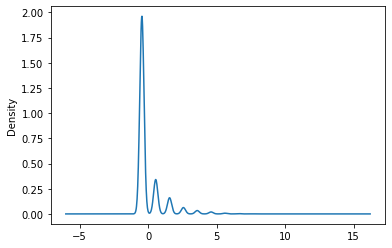

In [ ]:
normalpadrao.Total_Platforms.plot(kind = 'kde')

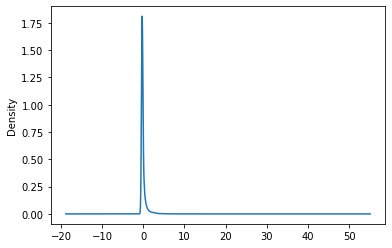

In [ ]:
normalpadrao.Global_Sales.plot(kind = 'kde')

###Conclusão

Um ponto de observação em relação ao Gráfico da Normal padrão do total de plataformas é o fato de ele não ser de fato uma normal padrão, vista a existência de múltiplas montanhas e vales. Supõe-se que pelo fato de que o total de plataformas é um dado discreto, ao aplicar a normal padrão o gráfico resultante é adulterado pela falta de continuidade dos valores, nota-se ainda que não existem elementos nesse gráfico que estejam na média, logo conclui-se que o método "StandardScaler" da biblioteca "sklearn" não é funcional para variáveis discretas.

Se trantando, no entanto, das vendas globais, podemos perceber que o gráfico sem mantém na média. Entretanto, considerando a escala do eixo "X" podemos perceber que há uma variação considerável de certos valores, aparentemente de 2 a 3 desvios padrões. Apesar disso, existem nos dados outliers muito grandes que não são bem representados graficamente.

Baseado nessas observações pode-se concluir que o método da Normal Padrão se prova extremamente últil em idicar a variação dos dados para com o média, apesar de não proporcionar muita visão em relação aos outliers, o que pode ocasionar numa possível tendência dos dados a depender dos outliers.

##Distribuição Amostral

Como se dá a Distribuição Amostral das vendas Globais?

O objetivo desta função é comparar a eficiência do método escolhido inicialmente neste trabalho (Média Truncada) definido na seção de Gráficos Iniciais.

In [ ]:
from matplotlib import pyplot
from numpy import mean

means_1 = [mean(sales_group.Global_Sales.sample(n = 100, replace = True)) for _ in range(1000)]
means_2 = [mean(sales_group.Global_Sales.sample(n = 200, replace = True)) for _ in range(1000)]
means_3 = [mean(sales_group.Global_Sales.sample(n = 500, replace = True)) for _ in range(1000)]
means_4 = [mean(sales_group.Global_Sales.sample(n = 1000, replace = True)) for _ in range(1000)]
means_5 = [mean(sales_group.Global_Sales.sample(n = 2000, replace = True)) for _ in range(1000)]
means_6 = [mean(sales_group.Global_Sales.sample(n = 5000, replace = True)) for _ in range(1000)]
means_7 = [mean(sales_group.Global_Sales.sample(n = 10000, replace = True)) for _ in range(1000)]

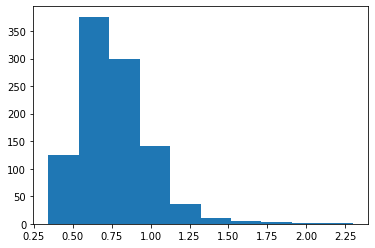

In [ ]:
pyplot.hist(means_1)
pyplot.show()

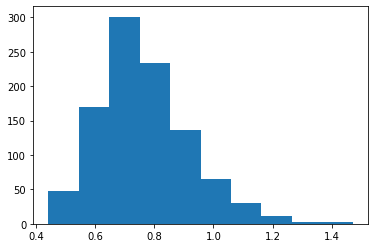

In [ ]:
pyplot.hist(means_2)
pyplot.show()

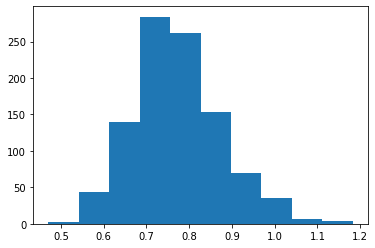

In [ ]:
pyplot.hist(means_3)
pyplot.show()

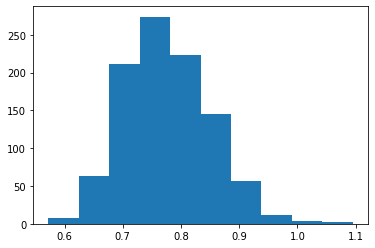

In [ ]:
pyplot.hist(means_4)
pyplot.show()

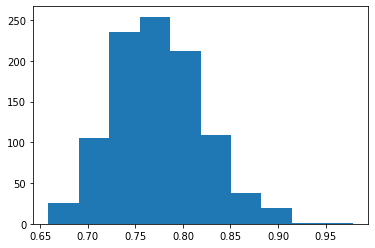

In [ ]:
pyplot.hist(means_5)
pyplot.show()

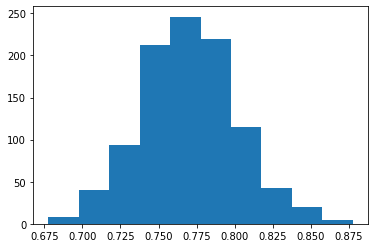

In [ ]:
pyplot.hist(means_6)
pyplot.show()

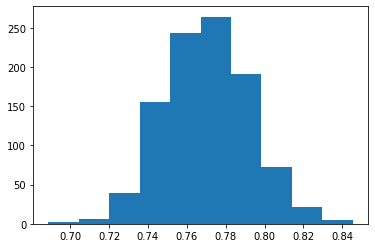

In [ ]:
pyplot.hist(means_7)
pyplot.show()

###Conclusão

No início deste dataset, a média truncada indicou uma média de vendas global de aproximadamente 0.6 milhões, enquanto que a distribuição amostral foi se tornando cada vez mais específica até ficar na faixa de 0.72-0.84. O método de média truncada consiste na remoção de um percentual dos dados ordenados em ordem crescente (ou descrescente) dito isso o método da média truncada remove uma quantidade considerável de outliers enquanto que a distribuição amostral não. Apesar da aleatoridade na coleta de amostras, como existem outliers no conjunto de dados que estão extremamente acima ou extremamente abaixo da média, o método de distribuição amostral se mostra falho em encontrar a média global quando os outliers se mostram extremamente distantes das demais amostras.

##Distribuição de Probabilidade

Esta sessão é apenas para o acompanhamento do Dataset das aulas, não tem propósito de análise.

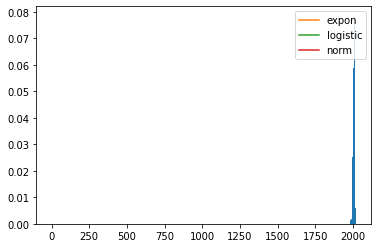

In [ ]:
import scipy
import scipy.stats
size=7
x = np.arange(size)
y = sales_group.Year_of_Release.values
h = plt.hist(y, density=True)

dist_names = ['expon', 'logistic', 'norm']
for dist_name in dist_names:
  dist = getattr(scipy.stats, dist_name) 
  params = dist.fit(y)
  arg = params[:-2]
  loc = params[-2]
  scale = params[-1]
  if arg: 
    pdf_fitted = dist.pdf(x, *arg, loc=loc, scale=scale)
  else:
    pdf_fitted = dist.pdf(x, loc=loc, scale=scale)
  plt.plot(pdf_fitted, label=dist_name)

plt.legend(loc= 'upper right')

Obs.: Os gráficos abaixo foram criados apenas com o objetivo de vizualizar as possíveis correlações dos dados, para que uma então fosse descorrida no trabalho, eles não tem objetivo de análise e interpretação propriamente ditos.

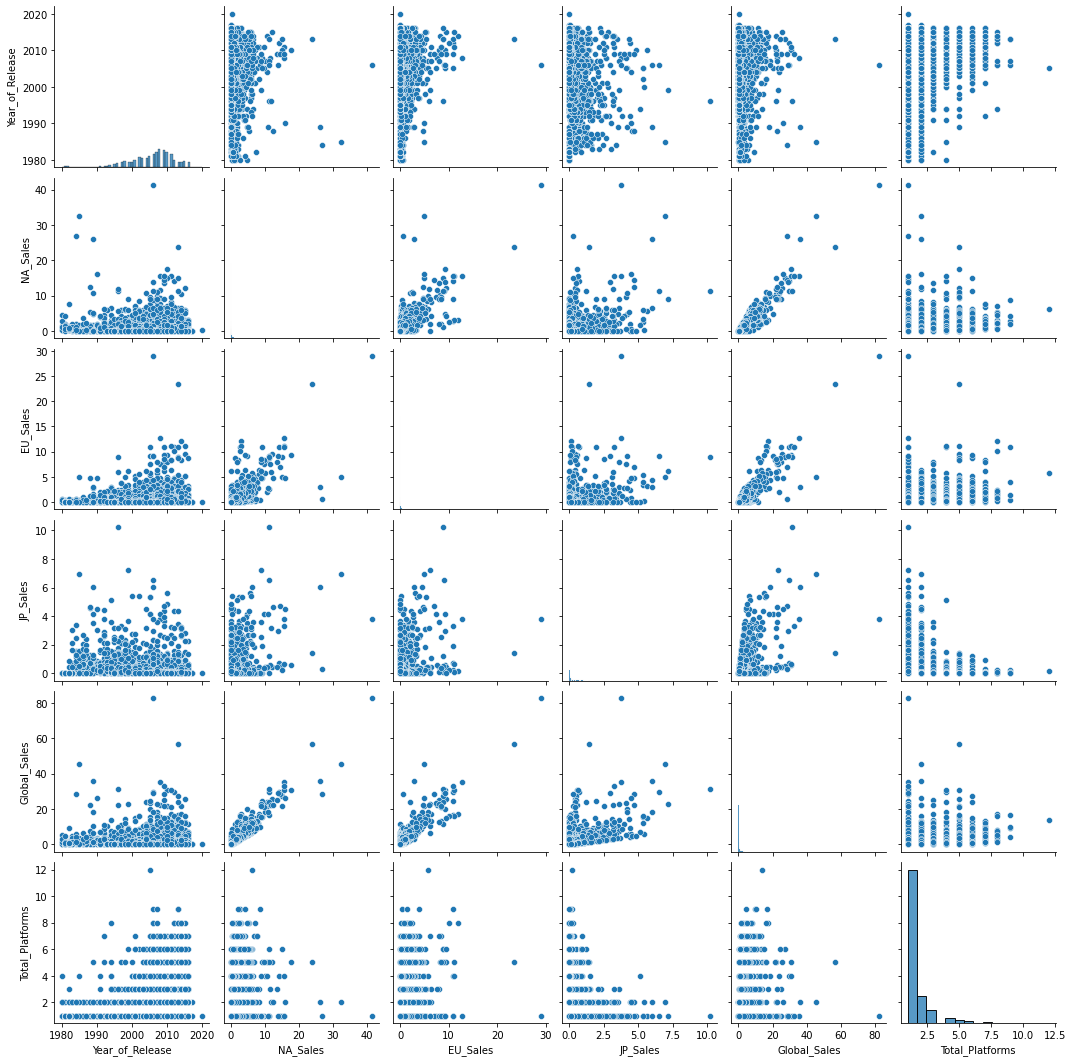

In [61]:
import seaborn as sns

col = ['Year_of_Release', 'Genre', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Global_Sales', 'Total_Platforms']
sns.pairplot(sales_group[col])